In [28]:
import os
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import find_peaks

In [29]:
with open("S10_af_time_series.pkl", "rb") as f:
    data = pickle.load(f)

afs = data["data"]

metas = pd.read_excel("S11_af_meta.xlsx")

In [30]:
metas

,sample_no,DynoWare,Path,Filename,Config ID,Setup ID,Manipulated,Filename 1,Filename 2,Date,...,Delay time [s],Cycle time [s],Cycles,Samples per channel,Cycle interval,Cycle No,filename,R,D,W
0,1,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 1.dwd,Sample 1.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 1.csv,1400,10,60
1,2,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 2.dwd,Sample 2.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 2.csv,1400,15,60
2,3,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 3.dwd,Sample 3.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 3.csv,1400,20,60
3,4,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 4.dwd,Sample 4.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 4.csv,1400,10,70
4,5,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 5.dwd,Sample 5.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 5.csv,1400,15,70
5,6,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 6.dwd,Sample 6.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 6.csv,1400,20,70
6,7,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 7.dwd,Sample 7.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 7.csv,1400,10,80
7,8,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 8.dwd,Sample 8.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 8.csv,1400,15,80
8,9,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 9.dwd,Sample 9.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 9.csv,1400,20,80
9,10,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 10.dwd,Sample 10.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 10.csv,1500,10,60


In [31]:
afs

,Time,Mz,Fz,Fy,Fx,sample_no
0,0.00,0.297328,0.044294,0.006714,0.004425,1
1,0.01,0.061471,0.029864,0.000741,-0.000011,1
2,0.02,0.296021,0.044425,0.006616,0.004381,1
3,0.03,0.061907,0.029253,0.000708,0.000011,1
4,0.04,0.301252,0.043509,0.006801,0.004469,1
...,...,...,...,...,...,...
972049,179.96,12.385800,0.244707,-0.010027,-0.015117,9
972050,179.97,12.677900,0.262844,-0.002616,-0.009668,9
972051,179.98,12.389700,0.245361,-0.010005,-0.015063,9
972052,179.99,12.678700,0.263192,-0.002638,-0.009635,9


Sample No: 1, Dwell Time: 10s, Sampling Rate: 100Hz, Welding Speed: 60 mm/min
time_start: 111.85s, time_end: 121.85s
time_start_idx: 11185, time_end_idx: 12185
idx diff: 1000
Weld End Time: 168.57s, Weld Time: 130.0s


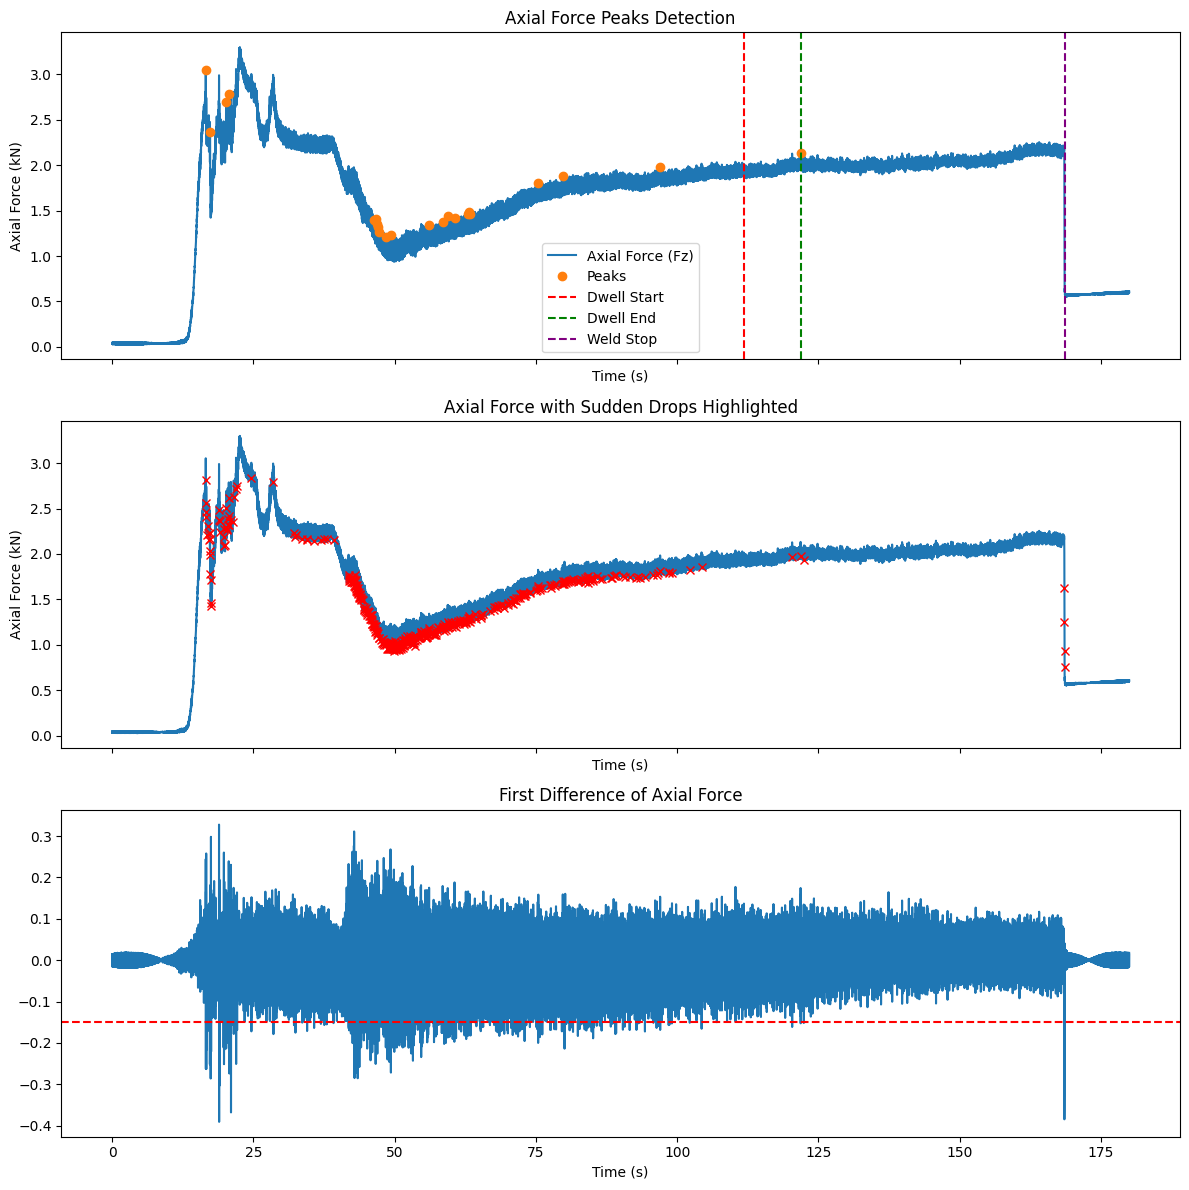

In [50]:
# Experimentation with a single sample
# Height is the required height of peaks: (min, max)
# Threshold is the required vertical distance to its neighboring samples0

sample_no = 1
peak_condition = dict(height=(1, None), threshold=0.15)
peak_idx_dwell_time_end_chosen = -1

# Extract relevant data
dwell_time = metas.loc[metas["sample_no"] == sample_no, "D"].values[0]
sampling_rate = metas.loc[metas["sample_no"] == sample_no, "Sampling rate [Hz]"].values[
    0
]
_welding_speed = metas.loc[metas["sample_no"] == sample_no, "W"].values[0] # mm/min
welding_speed = _welding_speed / 60  # Convert to mm/s
af = afs.loc[afs["sample_no"] == sample_no].reset_index(drop=True)
af.set_index("Time", inplace=True)

# Find the end of weld time based on sudden drop in axial force
fzDiff = af["Fz"].diff()  # First difference
z = (fzDiff - fzDiff.mean()) / fzDiff.std()  # Normalize (z-score)
abs_threshold = -0.15  # Absolute threshold for sudden drop detection
sudden_drops = (fzDiff < abs_threshold) 
drop_points = af.index[sudden_drops]
drop_idx_chosen = -1
weld_time_end_idx = drop_points.get_loc(drop_points[drop_idx_chosen])
weld_time_end = drop_points[drop_idx_chosen]

# Weld time is calculated from the speed and length of sample which is 130 mm
weld_time = 130 / welding_speed

# Estimate dwell time period
dwell_time_end_approx = weld_time_end - weld_time
dwell_time_start_approx = dwell_time_end_approx - dwell_time


# Find peaks in axial force data
fpeaks, props = find_peaks(af["Fz"], **peak_condition)
dwell_time_end_actual_idx = fpeaks[peak_idx_dwell_time_end_chosen]
dwell_time_end_actual = af.index[dwell_time_end_actual_idx]
dwell_time_start_actual = dwell_time_end_actual - dwell_time
dwell_time_start_actual_idx = af.index.get_loc(dwell_time_start_actual)

# Summary printout
print(
    f"Sample No: {sample_no}, Dwell Time: {dwell_time}s, Sampling Rate: {sampling_rate}Hz, Welding Speed: {_welding_speed} mm/min"
)
print(f"time_start: {dwell_time_start_actual}s, time_end: {dwell_time_end_actual}s")
print(f"time_start_idx: {dwell_time_start_actual_idx}, time_end_idx: {dwell_time_end_actual_idx}")
print(f"idx diff: {dwell_time_end_actual_idx - dwell_time_start_actual_idx}")
print(f"Weld End Time: {weld_time_end}s, Weld Time: {weld_time}s")

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
axes[0].plot(af.index, af["Fz"], label="Axial Force (Fz)")
axes[0].set_title("Axial Force Peaks Detection")
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Axial Force (kN)")
axes[0].plot(af.index[fpeaks], af["Fz"].iloc[fpeaks], "o", label="Peaks")
# Highlight dwell time
axes[0].axvline(x= dwell_time_start_actual, color="red", linestyle="--", label="Dwell Start")
axes[0].axvline(x=dwell_time_end_actual, color="green", linestyle="--", label="Dwell End")
axes[0].axvline(x=weld_time_end, color="purple", linestyle="--", label="Weld Stop")
axes[0].legend()

# Drop detection plot
axes[1].plot(af.index, af["Fz"], label="Axial Force (Fz)")
axes[1].plot(drop_points, af.loc[drop_points, "Fz"], "rx", label="Sudden Drops")
axes[2].plot(af.index, fzDiff, label="First Difference of Fz")
axes[2].axhline(y=abs_threshold, color="red", linestyle="--", label="Threshold")
axes[1].set_title("Axial Force with Sudden Drops Highlighted")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Axial Force (kN)")
axes[2].set_title("First Difference of Axial Force")
axes[2].set_xlabel("Time (s)")

# Optional: Set x-axis limits
# axes[0].set_xlim([dwell_time_start_actual - dwell_time * 0.1, 40])
fig.tight_layout()
plt.show()

In [44]:
search_area

,Mz,Fz,Fy,Fx,sample_no
Time,,,,,
27.57,-6.70122,2.32683,-0.260489,-0.182266,1
27.58,13.86150,2.32531,-0.296751,0.134474,1
27.59,16.11980,2.40618,-0.024109,0.146877,1
27.60,1.13613,2.43971,0.026311,-0.094463,1
27.61,-6.19420,2.33991,-0.216566,-0.180032,1
...,...,...,...,...,...
39.52,-8.58372,2.14251,-0.062921,-0.265339,1
39.53,11.83430,2.12163,-0.221133,0.052468,1
39.54,22.51330,2.17856,0.094419,0.226560,1


In [41]:
# Find peaks in axial force data
fpeaks, props = find_peaks(search_area["Fz"], **peak_condition)
fpeaks[-1]
# dwell_time_end_actual_idx = fpeaks[peak_idx_dwell_time_end_chosen]

af.iloc[fpeaks]
# dwell_time_end_actual = af.index[dwell_time_end_actual_idx]
# dwell_time_start_actual = dwell_time_end_actual - dwell_time
# dwell_time_start_actual_idx = af.index.get_loc(dwell_time_start_actual)

,Mz,Fz,Fy,Fx,sample_no
Time,,,,,
0.07,0.060599,0.029384,0.000643,-0.000044,1
0.19,0.058855,0.029559,0.000610,-0.000098,1
0.23,0.058419,0.029864,0.000632,-0.000054,1
0.37,0.053188,0.030169,0.000490,-0.000218,1
0.71,0.047520,0.029166,0.000392,-0.000240,1
...,...,...,...,...,...
10.82,0.088937,0.034092,0.001831,0.000828,1
10.95,0.365339,0.046561,0.006725,0.005210,1
11.60,0.139945,0.035531,0.001166,0.001112,1


In [45]:
search_area.index[dwell_time_end_actual_idx]

np.float64(39.25)

In [46]:
dwell_time_end_actual_idx

np.int64(1168)